In [9]:
import os
import numpy as np
import load_data
import pandas as pd
training_data, validation_data, test_data = load_data.load_()
import mlp
root_dir = os.path.abspath('../..')
proj_dir = os.path.join(root_dir,"submission")
data_dir= os.path.join(proj_dir, "data")

Network is the main class to execute the different methods.Code currently implements the neural network architecture with different activation functions and choice of different gradient options. The last layer is softmax and the loss function is cross entropy as these are pretty standard choices.The use of regularization has been omitted as the purpose was to study the different techniques and compare how they fare against each other


Whenever an instance of the Network class is called the following parameters are required:

n_layers : total number of layers (Example:   4)
nnodes   : a list having the number of nodes in the different layers. (Example:   [784,30,30,10]) here the first layer is the input and the last one is output. The remaining layers are the hidden layers


actfun   : takes one of the three possible activation functions namely tanh, ReLU and sigmoid gradient : takes one of the few possible gradient approaches, namely rmsprop,momentum,adagrad and vanilla gd

weights and biases: initializes the weights and biases of the neurons depending upon the network architecture
The divide by sqrt(x) is for an efficient initialization of weights()

velocity_biases and velocity_weights : initialize array with shape same as that of the weights and biases 
to facilitate the 
momentum and related gradients

cache_biases and cache_weights : same as the velocity_biases & wieghts for the adagrad and rmsprop gradients


This redundant update rule is done to make the whole process general and easier to run



In [10]:
#just change the mlp.ReLU to mlp.tanh or mlp.sigmoid in case that is needed
#just change the mlp.momentum to mlp.adgrad or mlp.rmsprop in case that is needed
net = mlp.Network(3,[784,40,10],mlp.tanh,mlp.momentum)
#results = net.train(training_data, 10, 10, 0.1,evaluation_data=validation_data)
#results=pd.DataFrame(results)
#results.transpose().to_csv(os.path.join(data_dir,"tanh_momentum_0dot1_30.csv"),header=None,index=None)

In [8]:
net.evaluate(test_data)

9585

In [11]:
import matplotlib.pyplot as plt

estimated_values,backprop_values=net.grad_check(training_data)
estimate=[values for i, values in np.ndenumerate(estimated_values)]
bp_value=[values for i, values in np.ndenumerate(backprop_values)]
    

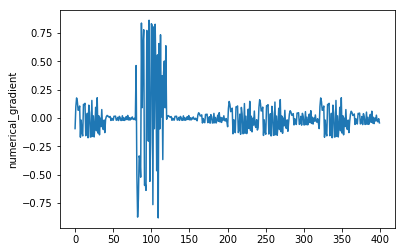

In [12]:
plt.plot([i for i in xrange(len(estimate))],estimate)
plt.ylabel('numerical_gradient')
plt.show()

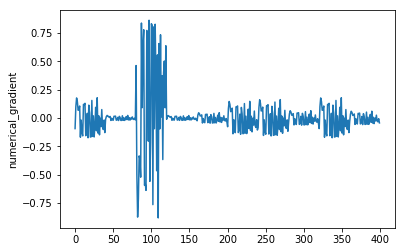

In [13]:
plt.plot([i for i in xrange(len(estimate))],bp_value)
plt.ylabel('numerical_gradient')
plt.show()

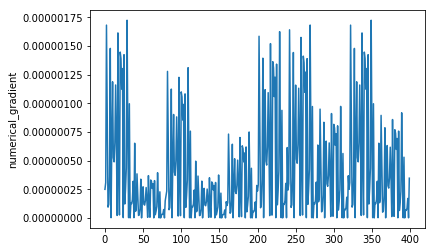

In [14]:
plt.plot([i for i in xrange(len(estimate))],[abs(e-b) for e,b in zip(estimate,bp_value)]/(np.maximum(estimate,bp_value).max()))
plt.ylabel('numerical_gradient')
plt.show()

In [ ]:
derivatives=pd.DataFrame([estimate,bp_value]).transpose()
derivatives.to_csv(os.path.join(data_dir,"derivatives.csv"))